In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import time

from PIL import Image
from io import BytesIO

In [2]:
class Layout:
    def __init__(self, ion):
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(221)
        self.r = self.fig.add_subplot(222)
        self.acc = self.fig.add_subplot(223)
        self.acc2 = self.fig.add_subplot(224)
        
        self.ax.set_title('Dream')
        self.r.set_title('Remember me')
        self.acc.set_title('Accuracy')
        self.acc2.set_title('Acceleration')
        #self.ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
        #self.ax.set_xticks(np.arange(-0.5, 20, 1));
        #self.ax.set_yticks(np.arange(-0.5, 20, 1));  
        ion()
        self.fig.show()
        self.fig.canvas.draw()
    def get(self):
        return self.fig, self.ax, self.r, self.acc, self.acc2

In [3]:
def generate_art(goal):
    return np.array([[[np.random.randint(1,255),
                       np.random.randint(1,255),
                       np.random.randint(1,255)
                       ],]*goal.shape[0],]*goal.shape[1], dtype=np.uint8)

In [4]:
def population(n, goal):
    population = []
    for _ in range(n):
        population.append(generate_art(goal))
    return population

In [5]:
def cost(ind,goal):
    errors = ind - goal
    cost = 0
    for i in errors:
        for j in i:
            cost += sum(j)
    return cost

In [6]:
def select_best(generation, goal, rate = 2):
    best = {}
    for g in range(len(generation)):
        best[g] = cost(generation[g],goal)
        
    _best = sorted(best, key=lambda k: best[k])
    best = []
    
    for b in _best[:POPULATION_COUNT//rate]:
        best.append(generation[b])
    return best

In [7]:
def crossover(parents, offspring_count):
    parents_count = len(parents)
    offsprings = []
    for i in range(2):
        for j in range(parents_count):
            parent1 = parents[np.random.randint(0, parents_count)]
            parent2 = parents[np.random.randint(0, parents_count)]

            parent1_mask = np.random.randint(0, 2, size = parent1.shape)
            parent2_mask = np.logical_not(parent1_mask)

            offspring = np.add(np.multiply(parent1, parent1_mask), np.multiply(parent2, parent2_mask))
            offsprings.append(offspring)
    return np.array(offsprings, dtype=np.uint8)

In [8]:
def mutation(individual, mutations_count):
    size1 = individual.shape[0]
    size2 = individual.shape[1]
    size3 = individual.shape[2]
    for i in range(mutations_count):
        row = np.random.randint(0, size1)
        column = np.random.randint(0, size2)
        channel = np.random.randint(0, size3)
        
        d = np.random.choice((-1,1))
        c = np.random.choice((range(1,2)))
        individual[row,column,channel] += d

    return individual

In [9]:
def mutate(individuals,rate=2,mutations_count=10):
    for i in range(0,len(individuals),rate):
        individuals[i] = mutation(individuals[i], mutations_count)
    return individuals

In [10]:
def genetic_algorithm(generation, goal):
    best = select_best(generation, goal, rate = 3)    
    offsprings = crossover(best, 3)
    mutants = mutate(offsprings, 2, 5)
    return mutants

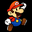

In [11]:
mario = "https://www.iconarchive.com/download/i27128/ph03nyx/super-mario/Paper-Mario.ico"
rainbow = "https://www.meme-arsenal.com/memes/134e84c9469ac0adeb62e6e3b10b9189.jpg"
response = requests.get(mario)
goal = Image.open(BytesIO(response.content)).convert("RGB")
goal = goal.resize((32, 32), Image.ANTIALIAS)
goal

In [12]:
POPULATION_COUNT = 699
GENERATIONS = 5000

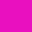

In [13]:
goal = np.array(goal)
generation = generate_art(goal)

Image.fromarray(generation)

In [14]:
generation = population(POPULATION_COUNT,goal)

<IPython.core.display.Javascript object>


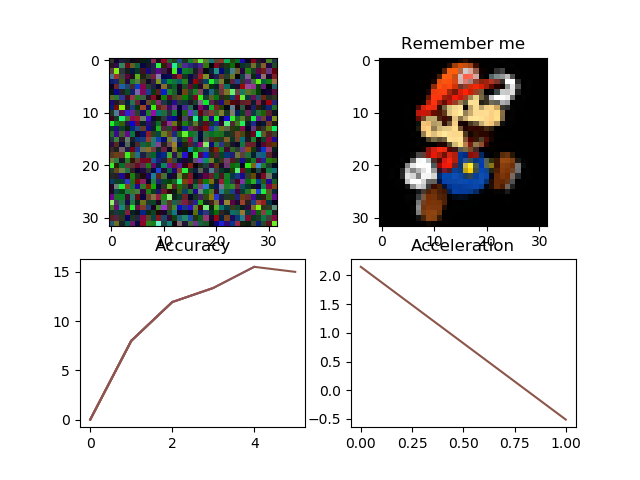

Generation #0 cost: 217836, acc: 0.0%
Generation #1 cost: 235272, acc: 8.0%
Generation #2 cost: 243844, acc: 11.94%
Generation #3 cost: 246954, acc: 13.37%
Generation #4 cost: 251638, acc: 15.52%
Generation #5 cost: 250535, acc: 15.01%
Generation #6 

In [ ]:
%matplotlib notebook
l = Layout(plt.ion)
fig, ax, r, _acc, _acc2 = l.get()
acc_list = []
dacc_list = []
_fcost = 0

r.imshow(goal)
fig.canvas.draw()

for i in range(GENERATIONS):
    print(f"Generation #{i}",end=" ")
    generation = genetic_algorithm(generation,goal)
    _generation = generation
    data = select_best(generation,goal)[0]
    
    _cost = cost(data,goal)
    
    if _fcost == 0:
        _fcost = _cost
        
    acc = abs(round((1 - _cost / _fcost)*100,2))
    acc_list.append(acc)
    
    if i > 3:
        dacc = acc_list[-1] - acc_list[-2]
        dacc_list.append(dacc)
    
    print(f"cost: {_cost}, acc: {acc}%")
    
    ax.clear()
    ax.imshow(data)
    _acc.plot(acc_list)
    _acc2.plot(dacc_list)
    fig.canvas.draw()